# Environment Setup  

Specify tensorflow version.

In [1]:
!pip3 install tensorflow==1.14 ## Change Here

     |████████████████████████████████| 109.2MB 94kB/s 
     |████████████████████████████████| 491kB 58.5MB/s 
     |████████████████████████████████| 3.2MB 49.8MB/s 
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow 1.15.0
    Uninstalling tensorflow-1.15.0:
      Successfully uninstalled tensorflow-1.15.0
     |████████████████████████████████| 276kB 5.1MB/s 
  Created wheel for PyYAML: filename=PyYAML-5.3-cp36-cp36m-linux_x86_64.whl size=44229 sha256=ad3ac623f49927f9883cea24d67ed24faaabbf489646e28790dd2c16458c81ad
  Stored in directory: /root/.cache/pip/wheels/e4/76/4d/a95b8dd7b452b69e8ed4f68b69e1b55e12c9c9624dd962b191
Successfully built PyYAML
  Found existing installation: PyYAML 3.13
    Uni

## Configure Tensorflow version

In [1]:
# Restart runtime using 'Runtime' -> 'Restart runtime...'
# %tensorflow_version 2.x
%tensorflow_version 1.x
import tensorflow as tf
import os
print(tf.__version__)
tf.compat.v1.enable_eager_execution()

device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))



/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

1.14.0


SystemError: ignored

## Mount Google Drive

In [6]:
import os
try:
  from google.colab import drive 
  drive.mount("/content/drive")
  IN_COLAB = True
except:
  IN_COLAB = False

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


## Setup Path

In [1]:
PROJ_PATH = '/content/drive/My Drive/ITI110/'
LINK_PATH = '/content/ITI110/'
LOCAL_PATH = '/content/tfod/'
TFOD_PATH = '/content/models/research/'
DATA_PATH = os.path.join(LINK_PATH, 'data')
## Export environment variables
os.environ['PROJ_PATH'] = PROJ_PATH
os.environ['DATA_PATH'] = DATA_PATH
os.environ['LINK_PATH'] = LINK_PATH
os.environ['TFOD_PATH'] = TFOD_PATH

NameError: ignored

## Setup Link Directory

In [0]:
%%shell

## Source Path 
export GDRIVE_PROJ_PATH=$PROJ_PATH
export LINK_PROJ_PATH="/content/"

echo $GDRIVE_PROJ_PAT
ln -s "$GDRIVE_PROJ_PATH" $LINK_PROJ_PATH

# Tensorboard  

To refresh, call %reload_ext tensorboard

In [12]:
%reload_ext tensorboard
%tensorboard --logdir /content/drive/My\ Drive/ITI110/models/model_ssd_coco/

Output hidden; open in https://colab.research.google.com to view.

# Install TFOD Library from Github  
Download model from zoo. This step is required everytime the session died. Setup and installation would take about 5 minutes. This is required for:  
* Run sample inference functions in this notebook
* Export Graph /TFLite Graph

***_Must configure tensorflow version before run this step_***

In [2]:
!apt-get install protobuf-compiler python-pil python-lxml python-tk
!pip install Cython
#!pip install jupyter
!pip3 install matplotlib==3.0.1 ## only support this version

!git clone https://github.com/tensorflow/models.git

%cd /content/models/research

!protoc object_detection/protos/*.proto --python_out=.

%set_env PYTHONPATH=/content/models/research:/content/models/research/slim

!python object_detection/builders/model_builder_test.py

Reading package lists... Done
Building dependency tree       
Reading state information... Done
protobuf-compiler is already the newest version (3.0.0-9.1ubuntu1).
python-tk is already the newest version (2.7.17-1~18.04).
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  python-bs4 python-chardet python-html5lib python-olefile
  python-pkg-resources python-six python-webencodings
Suggested packages:
  python-genshi python-lxml-dbg python-lxml-doc python-pil-doc python-pil-dbg
  python-setuptools
The following NEW packages will be installed:
  python-bs4 python-chardet python-html5lib python-lxml python-olefile
  python-pil python-pkg-resources python-six python-webencodings
0 upgraded, 9 newly installed, 0 to remove and 25 not upgraded.
Need to get 1,818 kB of archives.
After this operation, 7,688 kB of additional disk space will be used.
Get:1 htt

In [22]:
%%shell
## Download the model
rm -r /content/pretrained_ssd/
mkdir /content/pretrained_ssd/
cd /content/pretrained_ssd/
wget http://download.tensorflow.org/models/object_detection/ssd_mobilenet_v2_coco_2018_03_29.tar.gz

## unzip the model.tar.gz file 
tar -xvf ssd_mobilenet_v2_coco_2018_03_29.tar.gz

rm: cannot remove '/content/pretrained_ssd/': No such file or directory
--2020-02-26 06:53:19--  http://download.tensorflow.org/models/object_detection/ssd_mobilenet_v2_coco_2018_03_29.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 173.194.216.128, 2607:f8b0:400c:c12::80
Connecting to download.tensorflow.org (download.tensorflow.org)|173.194.216.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 187925923 (179M) [application/x-tar]
Saving to: ‘ssd_mobilenet_v2_coco_2018_03_29.tar.gz’

ssd_mobilenet_v2_co 100%[===================>] 179.22M   119MB/s    in 1.5s    

2020-02-26 06:53:21 (119 MB/s) - ‘ssd_mobilenet_v2_coco_2018_03_29.tar.gz’ saved [187925923/187925923]

ssd_mobilenet_v2_coco_2018_03_29/checkpoint
ssd_mobilenet_v2_coco_2018_03_29/model.ckpt.meta
ssd_mobilenet_v2_coco_2018_03_29/pipeline.config
ssd_mobilenet_v2_coco_2018_03_29/saved_model/saved_model.pb
ssd_mobilenet_v2_coco_2018_03_29/frozen_inference_graph.pb
ssd_mobilenet_v

# Export Graph 

Graph are directly export to Drive via link directory


## Graph

In [23]:
%%shell

PIPELINE_CONFIG_PATH=/content/ITI110/models/ssd_mobilenet_v2_coco.config ## Path of the config file

python3 /content/models/research/object_detection/export_inference_graph.py \
    --input_type image_tensor \
    --pipeline_config_path  ${PIPELINE_CONFIG_PATH} \
    --trained_checkpoint_prefix /content/ITI110/best/model.ckpt-3097  \
    --output_directory /content/ITI110/export_graph/

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

## SSD Graph


In [24]:
%%shell 

cd  /content/models/research/object_detection

python3 export_tflite_ssd_graph.py \
--pipeline_config_path=/content/ITI110/models/ssd_mobilenet_v2_coco.config \
--trained_checkpoint_prefix=/content/ITI110/best/model.ckpt-3097 \
--output_directory=/content/ITI110/tflite/


/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

## TFLite Conversion

In [27]:
%%shell 

cd  /content/models/research/object_detection

tflite_convert \
--graph_def_file=/content/ITI110/tflite/tflite_graph.pb \
--output_file=/content/ITI110/export_graph/detect.tflite \
--output_format=TFLITE \
--input_shapes=1,300,300,3 \
--input_arrays=normalized_input_image_tensor \
--output_arrays='TFLite_Detection_PostProcess','TFLite_Detection_PostProcess:1','TFLite_Detection_PostProcess:2','TFLite_Detection_PostProcess:3' \
--inference_type=FLOAT \
--mean_values=128 \
--std_dev_values=128 \
--change_concat_input_ranges=false \
--allow_custom_ops

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

# Test Run Inference from Graph

In [12]:
import numpy as np
import os
import six.moves.urllib as urllibcategory_index
import sys
import tarfile
import tensorflow as tf
import zipfile
from tqdm import tqdm
from shutil import copy2
import matplotlib, time
from distutils.version import StrictVersion
from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image

print(tf.__version__)

1.14.0




## Setup TFOD Library Path

In [0]:
# root Tensorflow model directory. Modify this accordingly
TF_MODELS_RESEARCH_DIR = '/content/models/research/'
TF_SLIM_DIR = os.path.join(TF_MODELS_RESEARCH_DIR, 'slim/')
TF_OD_DIR = os.path.join(TF_MODELS_RESEARCH_DIR, 'object_detection/')

sys.path.append(TF_MODELS_RESEARCH_DIR)
sys.path.append(TF_SLIM_DIR)
sys.path.append(TF_OD_DIR)

## Import custom function

In [0]:
#from utils import ops as utils_ops

from utils import label_map_util
from utils import visualization_utils as vis_util

## Setup Graph and Label file path

In [5]:
PATH_TO_FROZEN_GRAPH = '/content/ITI110/export_graph/frozen_inference_graph.pb'
PATH_TO_LABELS = '/content/ITI110/data/label_map.pbtxt'

category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS, use_display_name=True)

## Load the (frozen) Tensorflow model into memory.

In [0]:
detection_graph = tf.Graph()
with detection_graph.as_default():
    od_graph_def = tf.GraphDef()
    with tf.gfile.GFile(PATH_TO_FROZEN_GRAPH, 'rb') as fid:
        serialized_graph = fid.read()
        od_graph_def.ParseFromString(serialized_graph)
        tf.import_graph_def(od_graph_def, name='')

## Wrapper Function

In [0]:
def load_image_into_numpy_array(image):
    (im_width, im_height) = image.size
    return np.array(image.getdata()).reshape(
        (im_height, im_width, 3)).astype(np.uint8)

def run_inference_for_single_image(image_path, graph):
    image = Image.open(image_path)
    
    with graph.as_default():
        with tf.Session() as sess:
        # Get handles to input and output tensors
            image_tensor = graph.get_tensor_by_name('image_tensor:0')
            detection_boxes = graph.get_tensor_by_name('detection_boxes:0')
            detection_scores = graph.get_tensor_by_name('detection_scores:0')
            detection_classes = graph.get_tensor_by_name('detection_classes:0')
            num_detections = graph.get_tensor_by_name('num_detections:0')

            image_np = load_image_into_numpy_array(image)
            # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
            image_np_expanded = np.expand_dims(image_np, axis=0)
            [detection_boxes, detection_scores, detection_classes, num_detections],
            # Run inference
            
            (boxes, scores, classes, num) = sess.run(
                            [detection_boxes, detection_scores, detection_classes, num_detections],
                            feed_dict={image_tensor: image_np_expanded})
            
            return (boxes, scores, classes, num)
            
            vis_util.visualize_boxes_and_labels_on_image_array(
                        image_np,
                        np.squeeze(boxes),
                        np.squeeze(classes).astype(np.int32),
                        np.squeeze(scores),
                        category_index,
                        min_score_thresh=0.4,
                        use_normalized_coordinates=True,
                        line_thickness=10)
            

            # Size, in inches, of the output images.
            IMAGE_SIZE = (12, 8)
            plt.figure(figsize=IMAGE_SIZE)
            plt.imshow(image_np)
            

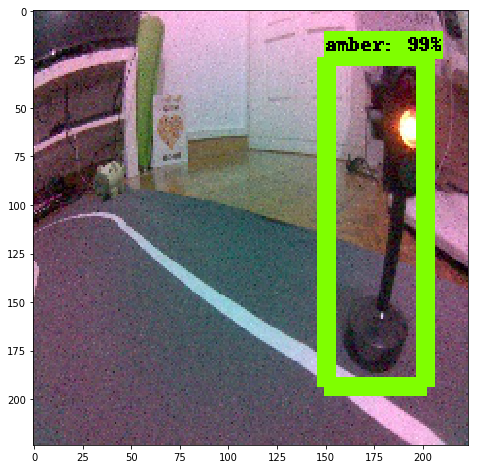

In [9]:
image = '/content/ITI110/data/images/xy_050_050_A_37.jpg'
run_inference_for_single_image(image, detection_graph)

## Benchmark

In [16]:
start_time = time.time()
x = 1 # displays the frame rate every 1 second
counter = 0
i = 0
for i in range(1):
  
  run_inference_for_single_image(image, detection_graph)

  counter+=1
  if (time.time() - start_time) > x :
    print("FPS: ", counter / (time.time() - start_time))
    counter = 0
    
    start_time = time.time()
  
  i += 1

FPS:  0.545397614676036
